In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calmap
from copy import deepcopy

In [35]:
df = pd.read_csv("data.txt", sep=' ', index_col="Id")
df

,Hour,Minute,Day,Month,Year,Count
Id,,,,,,
0,21,46,23,6,22,1
1,21,54,23,6,22,3
2,21,57,23,6,22,3
3,22,3,23,6,22,4
4,23,28,23,6,22,2
...,...,...,...,...,...,...
558,6,52,17,3,23,5
559,6,59,17,3,23,4
560,7,4,17,3,23,4


In [36]:
df[df.Year == 0]

,Hour,Minute,Day,Month,Year,Count
Id,,,,,,
373,0,0,1,1,0,1


In [37]:
df = df[df.Year != 0]

In [38]:

df['Year'] = df['Year'] + 2000
df = df.drop(['Hour', 'Minute'], axis=1)
df['datetime'] = pd.to_datetime(df[["Year", "Month", "Day"]])
df = df.drop(['Year', 'Month', 'Day'], axis=1)
df = pd.Series(df.Count.values, df['datetime'])
df

C:\Users\macie\AppData\Local\Temp\ipykernel_14128\1834819265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'] + 2000


datetime
2022-06-23    1
2022-06-23    3
2022-06-23    3
2022-06-23    4
2022-06-23    2
             ..
2023-03-17    5
2023-03-17    4
2023-03-17    4
2023-03-17    4
2023-03-17    3
Length: 564, dtype: int64

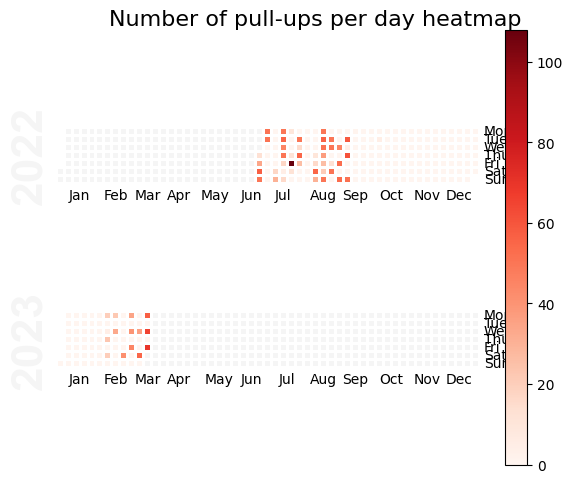

In [39]:

fig, ax = calmap.calendarplot(df)                                                                                                                          
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())  
fig.suptitle('Number of pull-ups per day heatmap', fontsize=16)
plt.show()

(0.0, 100.0)

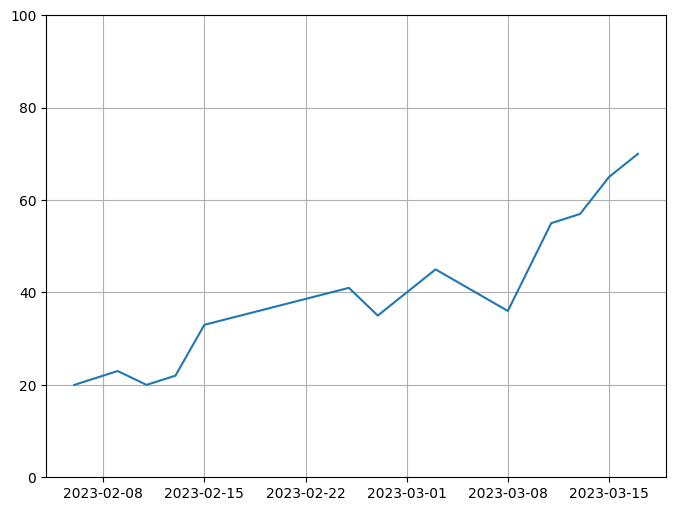

In [45]:
tempDf = df.resample('D').sum()
tempDf = tempDf[tempDf.values != 0]
tempDf= tempDf[tempDf.index >= '2023-1-1']
tempDf = tempDf[tempDf.values >= 10]
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(tempDf)
plt.grid()
plt.ylim([0,100])

In [41]:
tempDf.max()

70

(0.0, 10.0)

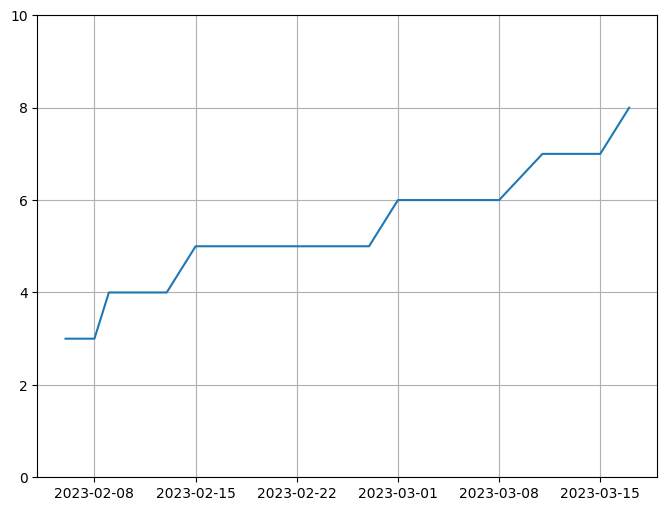

In [46]:
tempDf = df.resample('D').max()
tempDf = tempDf[tempDf.values != 0]
tempDf= tempDf[tempDf.index >= '2023-1-1']
tempDf = tempDf[tempDf.values >= 0]
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(tempDf)
plt.grid()
plt.ylim([0,10])

In [43]:
tempDf.max()

8.0